# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [2]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

У нас проблемы со столбцами Income(float64), Dt_Customer(datetime)

In [3]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

Перед тем как менять тип признака, можно заметить, что у нас есть пропущенные значения. Так как тип переменной изначально object, мы заполним пропущенные значения на пустую строку

In [5]:
df['Income'].fillna("", inplace=True)

In [7]:
new_income = []
for i in df["Income"]:
    if i == "":
        new_income.append(0)
        continue
    new_income.append(float(i.replace("$", "").replace(",", "")))

In [8]:
df["Income"] = new_income

In [9]:
pd.to_numeric(df["Income"], downcast='float')

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float32

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [10]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [11]:
df["Dt_Customer"]

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Заменим все пропущенные значения(которые до этого мы заменили на 0, чтобы обработать признак Income) на среднее значение признака с неким шумом, который мы будем брать, отталкиваясь от стандартного отклонения

In [16]:
df["Income"].describe()

count      2240.000000
mean      51687.459375
std       25609.342730
min           0.000000
25%       34722.000000
50%       51075.000000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [20]:
min_value = np.mean(df["Income"]) - np.std(df["Income"])
max_value = np.mean(df["Income"]) + np.std(df["Income"])

In [21]:
np.random.seed(0)
uproar_data = np.random.randint(min_value, max_value, 24)
uproar_data

array([28815, 69650, 68696, 71974, 47326, 56486, 58186, 68076, 46840,
       72967, 41018, 41513, 74683, 65595, 40733, 43172, 58313, 45066,
       69178, 50235, 61748, 43004, 53552, 65067])

In [24]:
j = 0
for i in range(len(df["Income"])):
    if df["Income"][i] == 0:
        df["Income"][i] = uproar_data[j]
        j += 1

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

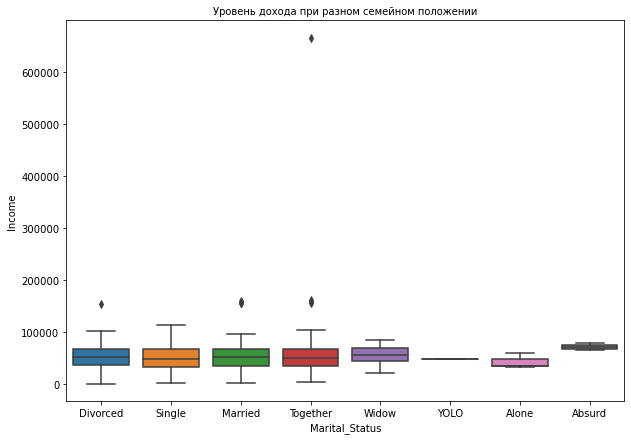

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title('Уровень дохода при разном семейном положении', fontsize=10)
plt.show()

Тут мы рассмотрели уровень дохода при разном семейном положении, мы сразу можем заметить, что практически все подгруппы имеет верхний ус на показателе ~110k, также можно заметить, что распределение у трех подгрупп очень маленькое, так что мы уберем эти подгруппы

In [40]:
df = df.loc[df["Marital_Status"] != "Absurd"] 
df = df.loc[df["Marital_Status"] != "YOLO"] 
df = df.loc[df["Marital_Status"] != "Alone"]

Теперь построим несколько графиков, которые будут показывать распределение нескольких признаков при разном семейном положении

In [41]:
numerical = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

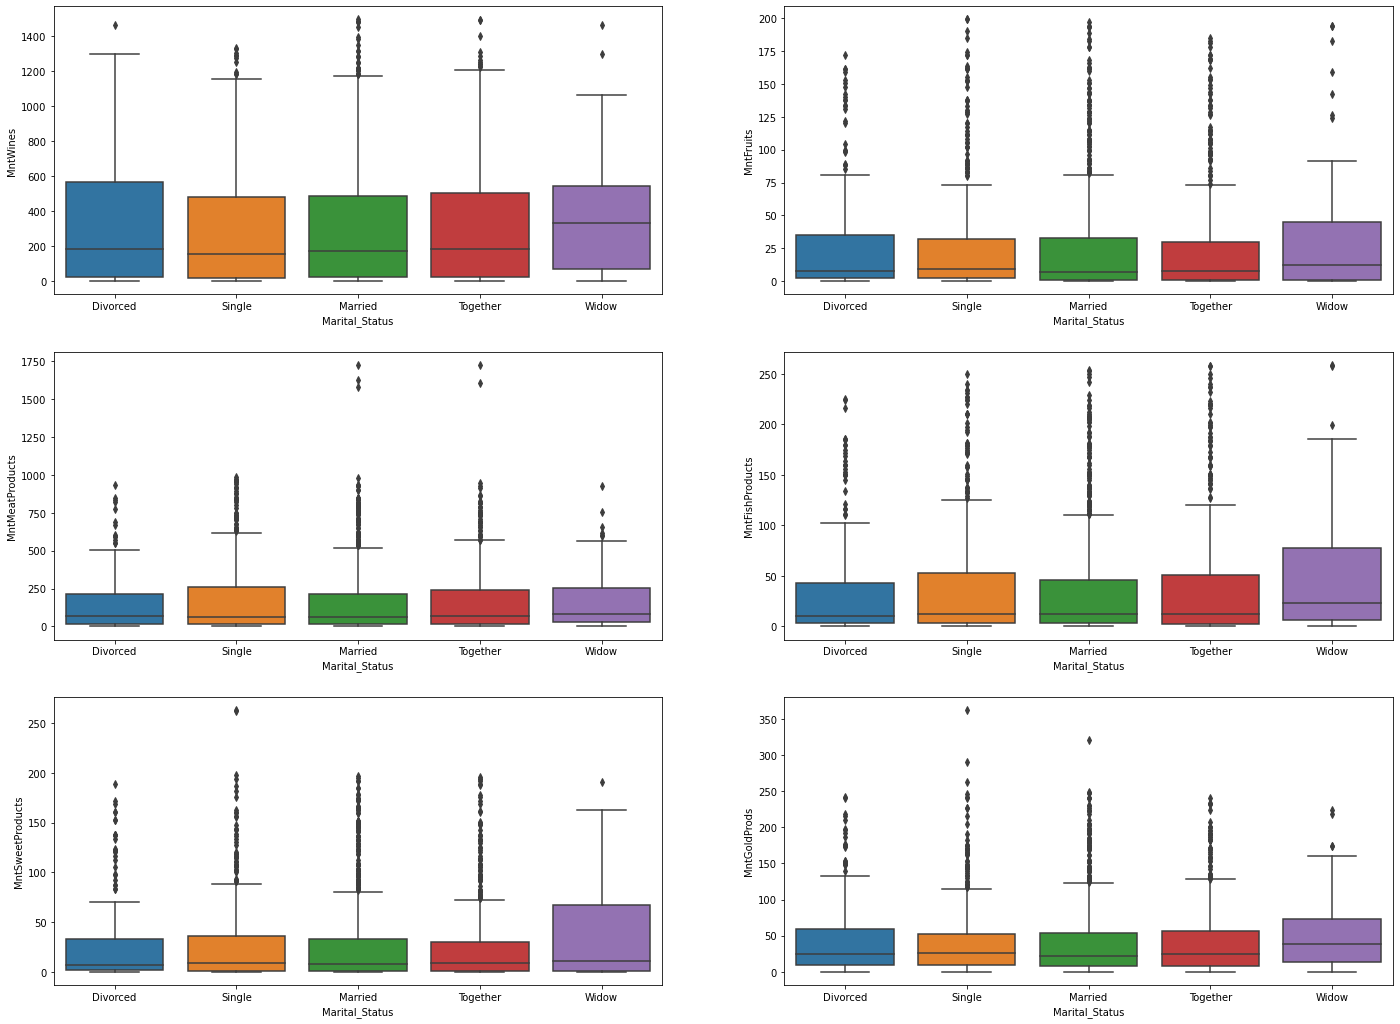

In [42]:
fig = plt.figure(figsize=(24, 18))
for i in range(len(numerical)):
    ax = fig.add_subplot(3, 2, i + 1)
    sns.boxplot(x='Marital_Status', y=numerical[i], data=df)
plt.show()

Теперь тоже самое сделаем и с разным уровнем образования

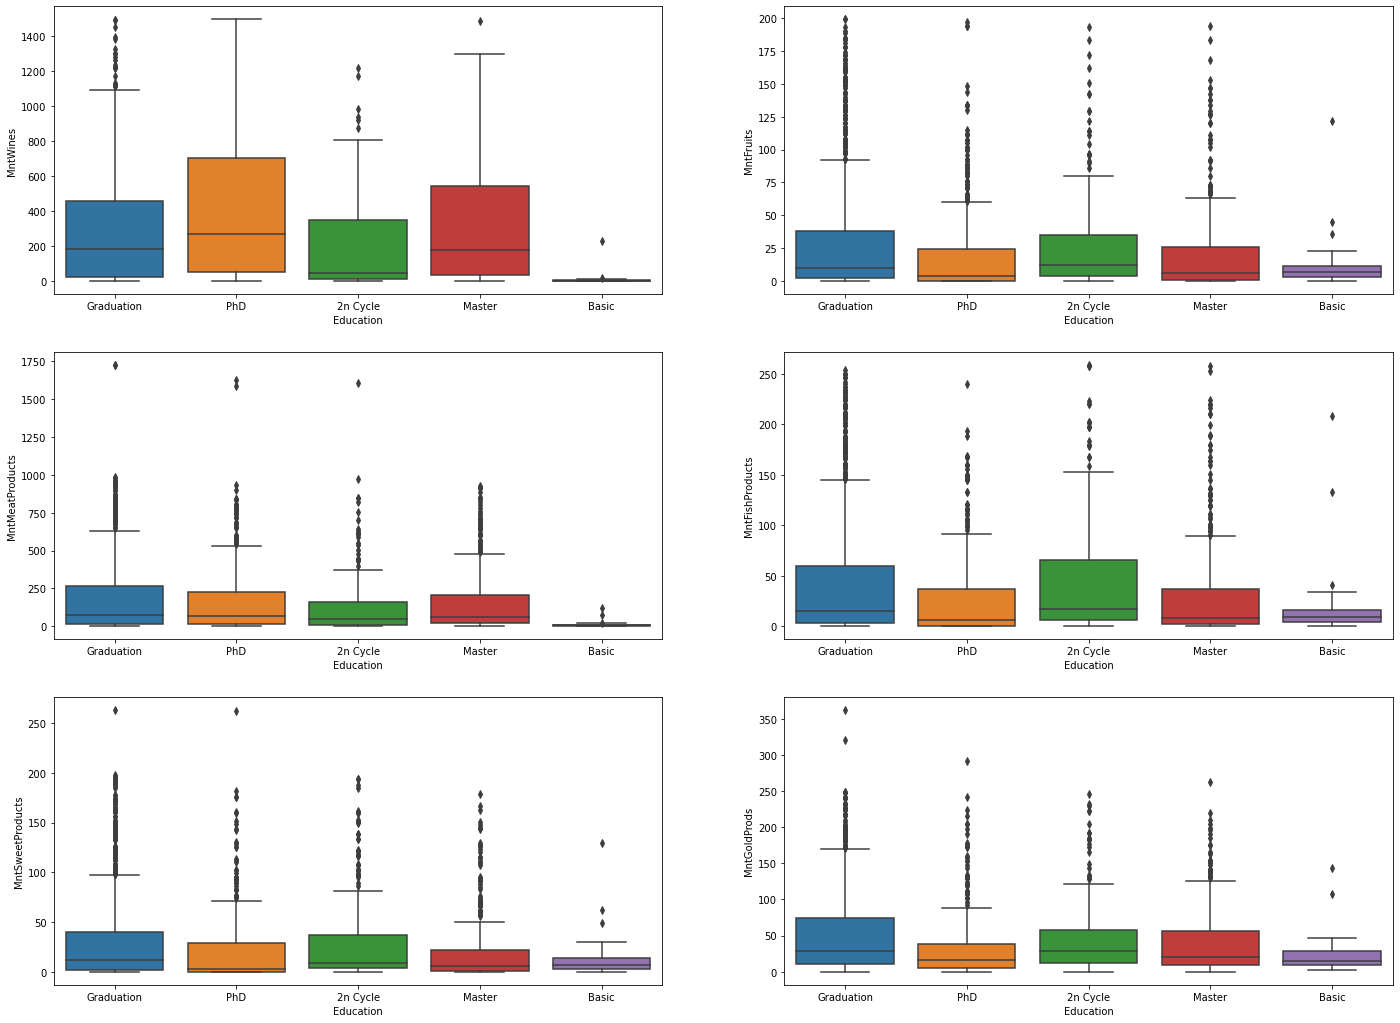

In [43]:
fig = plt.figure(figsize=(24, 18))
for i in range(len(numerical)):
    ax = fig.add_subplot(3, 2, i + 1)
    sns.boxplot(x="Education", y=numerical[i], data=df)
plt.show()

Теперь по странам

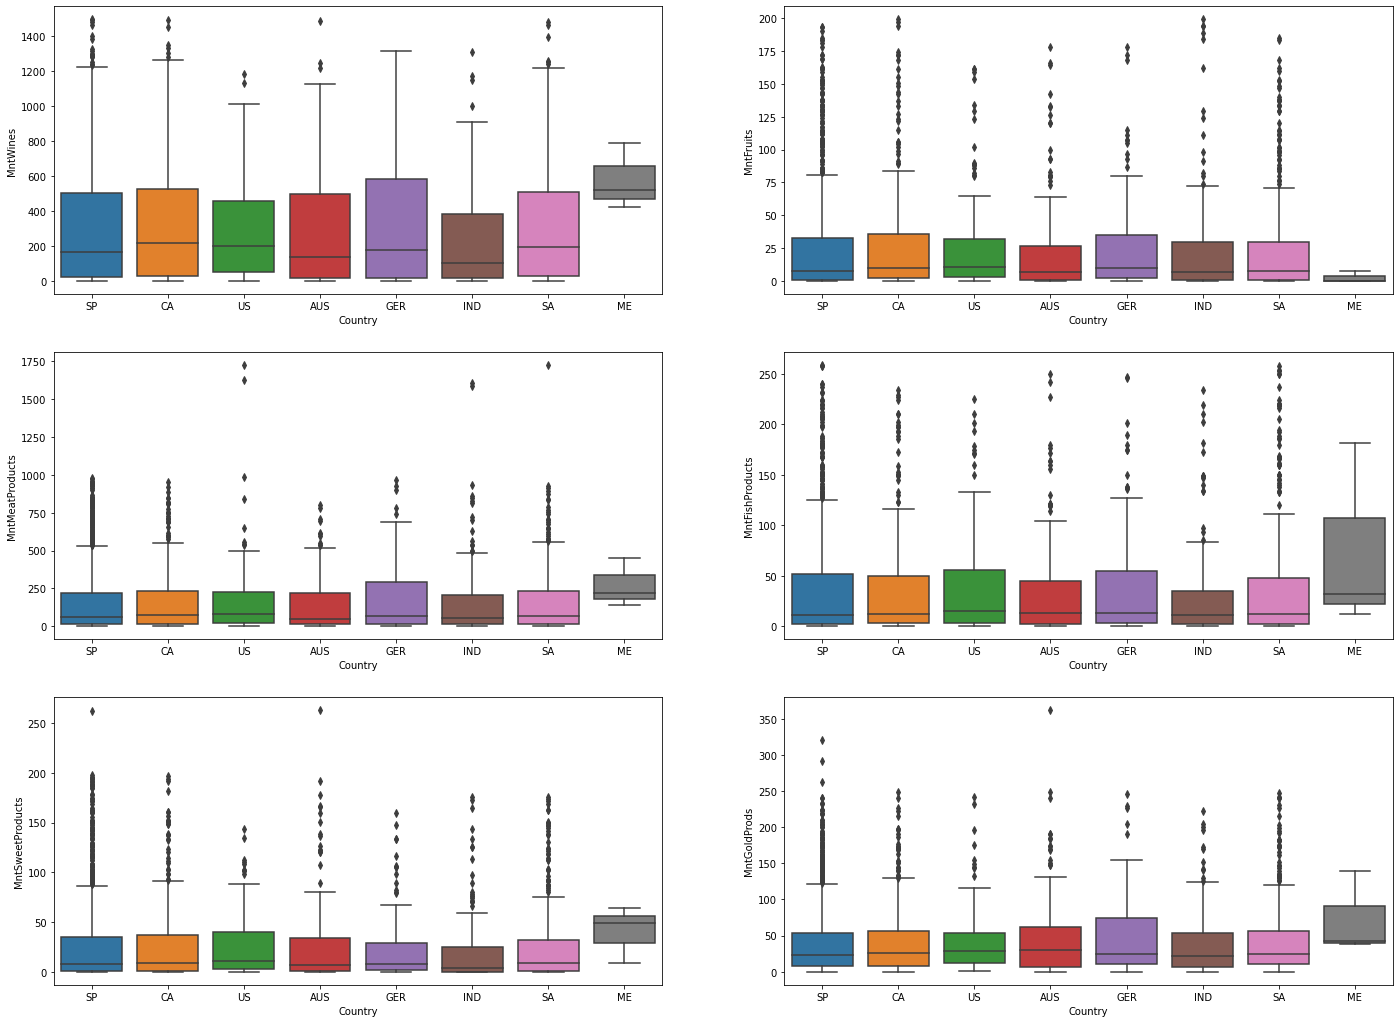

In [44]:
fig = plt.figure(figsize=(24, 18))
for i in range(len(numerical)):
    ax = fig.add_subplot(3, 2, i + 1)
    sns.boxplot(x='Country', y=numerical[i], data=df)
plt.show()

Теперь будем чистить, а еще стоит обратить внимание на страну ME, ее распределение не сильно велико, так что уберем эту страну

In [45]:
df = df[df["Country"] != "ME"]

Теперь будем усреднять значение выбросов по семейному положению, стране и образованию

In [46]:
df = df[df["Income"] < 100000]
df = df[df["MntWines"] < 1100]
df = df[df["MntFruits"] < 80]
df = df[df["MntMeatProducts"] < 570]
df = df[df["MntFishProducts"] < 100]
df = df[df["MntSweetProducts"] < 80]
df = df[df["MntGoldProds"] < 140]

In [48]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND
2234,9977,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,...,5,4,0,0,0,0,0,0,0,US
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP


Теперь посмотрим на остальные количественные признаки

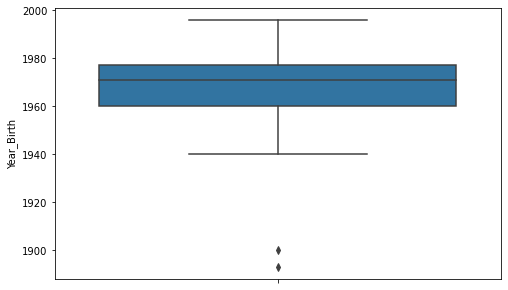

In [52]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y="Year_Birth", data=df)
plt.show()

In [53]:
df = df[df["Year_Birth"] > 1940]

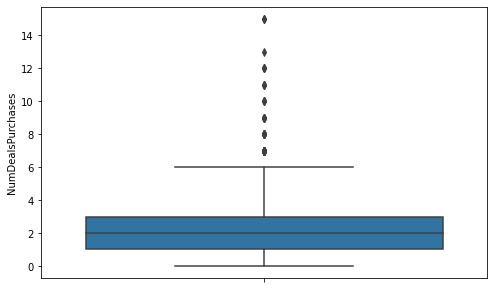

In [54]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y="NumDealsPurchases", data=df)
plt.show()

In [55]:
df = df[df["NumDealsPurchases"] <= 6]

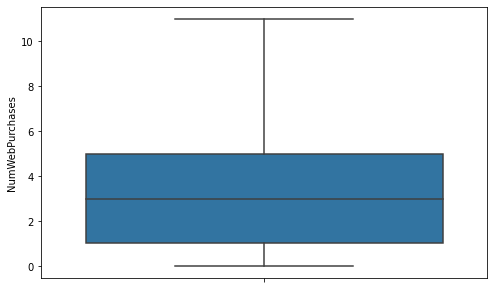

In [56]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y="NumWebPurchases", data=df)
plt.show()

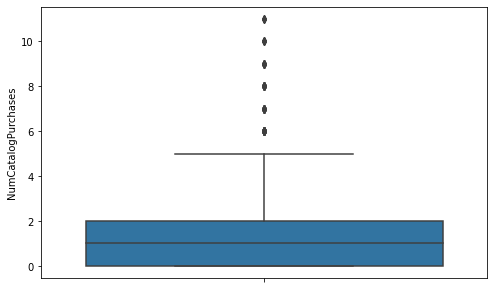

In [57]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y="NumCatalogPurchases", data=df)
plt.show()

In [58]:
df = df[df["NumCatalogPurchases"] <= 5]

In [60]:
df = df.reset_index()

In [62]:
df.drop(columns=["index", "ID"])

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
1,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,5,2,0,0,0,0,0,0,0,US
2,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
3,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
4,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,0,...,3,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,1973,Graduation,Widow,42429.0,0,1,2014-02-11,99,55,0,...,3,5,0,0,0,0,0,0,0,SP
1427,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,11,...,5,4,0,0,0,0,0,0,0,US
1428,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,...,11,4,0,0,0,0,0,0,0,US
1429,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,3,8,0,0,0,0,0,0,0,SP


## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

Сделаем категориальную переменную, которая будет показывать, как часто клиент пьет, мы уже обработали данные и знаем, что у нас распределение трат на винную продукцию составляет от 0 до 1100, следовательно разделим данную выборку на людей, кто практически не пьет/мало пьет/средне пьет/пьет выше среднего/много пьет

In [63]:
Wine_status = []
for i in df["MntWines"]:
    if 0 <= i < 200:
        Wine_status.append("practically does not drink")
    elif 200 <= i < 500:
        Wine_status.append("doesn't drink much")
    elif 500 <= i < 700:
        Wine_status.append("average drinker")
    elif 700 <= i < 900:
        Wine_status.append("drinks above average")
    elif 900 <= i <= 1100:
        Wine_status.append("drinks a lot")
df["Wine_status"] = Wine_status

In [64]:
df["Wine_status"]

0               doesn't drink much
1       practically does not drink
2       practically does not drink
3       practically does not drink
4       practically does not drink
                   ...            
1426    practically does not drink
1427            doesn't drink much
1428            doesn't drink much
1429    practically does not drink
1430    practically does not drink
Name: Wine_status, Length: 1431, dtype: object

Тоже самое сделаем и с мясом

In [66]:
Meat_status = []
for i in df["MntMeatProducts"]:
    if 0 <= i < 190:
        Meat_status.append("eats little")
    elif 190 <= i < 380:
        Meat_status.append("eats average")
    elif 380 <= i < 570:
        Meat_status.append("eats a lot")

In [67]:
df["Meat_status"] = Meat_status

In [68]:
df["Meat_status"]

0        eats little
1        eats little
2        eats little
3        eats little
4        eats little
            ...     
1426     eats little
1427    eats average
1428     eats little
1429     eats little
1430     eats little
Name: Meat_status, Length: 1431, dtype: object

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [69]:
df.describe(include="object")

,Education,Marital_Status,Country,Wine_status,Meat_status
count,1431,1431,1431,1431,1431
unique,5,5,7,5,3
top,Graduation,Married,SP,practically does not drink,eats little
freq,684,557,711,1077,1336


Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [70]:
df.describe()

,index,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,...,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,1120.856045,5587.627533,1969.590496,41703.222921,0.607966,0.561146,49.206150,152.947589,8.956674,56.642208,...,1.134871,4.501048,6.086653,0.062194,0.053110,0.009783,0.013976,0.004892,0.094340,0.009783
std,646.065755,3261.720109,11.156359,16168.359180,0.541346,0.544778,28.937528,223.303289,13.670634,82.668725,...,1.308116,2.558648,1.970988,0.241592,0.224331,0.098460,0.117433,0.069794,0.292403,0.098460
min,1.000000,1.000000,1943.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,562.500000,2788.500000,1961.000000,29805.000000,0.000000,0.000000,24.000000,12.000000,1.000000,10.000000,...,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1115.000000,5512.000000,1971.000000,40590.000000,1.000000,1.000000,49.000000,42.000000,4.000000,23.000000,...,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1693.000000,8401.000000,1978.000000,53602.500000,1.000000,1.000000,75.000000,196.000000,11.000000,69.000000,...,2.000000,5.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2237.000000,11191.000000,1996.000000,86580.000000,2.000000,2.000000,99.000000,1090.000000,77.000000,567.000000,...,5.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [72]:
df.groupby("Marital_Status")[["Year_Birth", "Income", "MntSweetProducts"]].agg(["mean", "median", "std"])

Year_Birth                           Income           \
                       mean  median        std          mean   median   
Marital_Status                                                          
Divorced        1966.834437  1968.0   9.851180  43761.145695  42618.0   
Married         1970.714542  1972.0  10.972465  41635.443447  40321.0   
Single          1972.092715  1972.5  11.379793  39911.178808  38618.0   
Together        1968.292553  1969.0  10.868158  41686.898936  40465.0   
Widow           1958.977778  1957.0   9.257648  47799.711111  47570.0   

                             MntSweetProducts                    
                         std             mean median        std  
Marital_Status                                                   
Divorced        16914.014402         8.158940    3.0  12.757791  
Married         16231.197529         8.475763    4.0  12.611440  
Single          16090.443860         8.605960    4.0  13.256492  
Together        15894.268218         8.872340    4.0  13.297807  
Widow           13885.349872        11.333333    3.0  18.254514

Довольно логично, что семейное положение коррелирует с годом рождения, вдовы старше, одинокие моложе.
Признак income не так ярко интерпретируется.

In [73]:
df.groupby("Education")[["Year_Birth", "Income", "MntSweetProducts"]].agg(["mean", "median", "std"])

Year_Birth                           Income           \
                   mean  median        std          mean   median   
Education                                                           
2n Cycle    1974.899225  1976.0   9.630554  35737.503876  33812.0   
Basic       1977.903846  1979.0  11.141267  19905.692308  20425.0   
Graduation  1970.138889  1971.0  11.051709  40792.413743  39734.5   
Master      1967.468504  1968.5  10.754767  44323.854331  43779.5   
PhD         1966.535256  1968.0  10.699883  47666.051282  46672.0   

                         MntSweetProducts                    
                     std             mean median        std  
Education                                                    
2n Cycle    15645.667391        10.449612    7.0  12.992162  
Basic        5953.113295         9.153846    7.0  10.198779  
Graduation  15901.961277         9.419591    4.0  13.450445  
Master      14744.644607         7.803150    3.0  12.502989  
PhD         15031.186677         6.887821    1.0  13.310426

Тут также год рождения явно коррелирует с образованием, чем старше-тем выше образования. Также с повышением образования, повышаем и доход.

In [74]:
df.groupby("Country")[["Year_Birth", "Income", "MntSweetProducts"]].agg(["mean", "median", "std"])

Year_Birth                           Income                         \
                mean  median        std          mean   median           std   
Country                                                                        
AUS      1968.048077  1970.0  11.779841  41957.971154  41585.5  15753.742366   
CA       1968.378049  1970.0  10.088735  41997.000000  41363.5  16218.355852   
GER      1969.285714  1971.0   9.753349  42888.688312  40662.0  16158.743675   
IND      1971.921569  1973.0  10.791165  39122.774510  38430.5  16499.473873   
SA       1970.384615  1971.0  10.961335  42233.288462  41232.0  15528.651376   
SP       1969.637131  1971.0  11.361808  41390.943741  39763.0  16260.404080   
US       1968.769231  1970.0  12.721499  44919.046154  46390.0  17138.815586   

        MntSweetProducts                    
                    mean median        std  
Country                                     
AUS             7.913462    2.5  12.791920  
CA              8.451220    4.0  12.621583  
GER             8.441558    4.0  13.572896  
IND             8.000000    3.0  13.931942  
SA              8.129808    3.0  12.174952  
SP              8.846695    4.0  13.217162  
US             11.415385    5.0  15.451428

Каждый показатель довольно усредненный у каждой страны.

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [76]:
df = df.drop(columns=["index"])

In [77]:
df.corr().abs().unstack().sort_values().drop_duplicates()[-4:-1]

MntWines           NumWebPurchases        0.714908
                   NumCatalogPurchases    0.743919
NumStorePurchases  MntWines               0.782574
dtype: float64

Когда мы обрабатывали данные, мы заметили, что винная продукция пользуется популярностью у клиентов на фоне остальной продукции. Следовательно логично, что чем больше будет сделано покупок(через интернет, каталог, магазин), тем больше винной продукции будет куплено.

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

Теперь посмотрим на взаимосвязь количественных признаков, заодно построим их гистограмму частот и график распределения.

<Figure size 2160x2160 with 0 Axes>

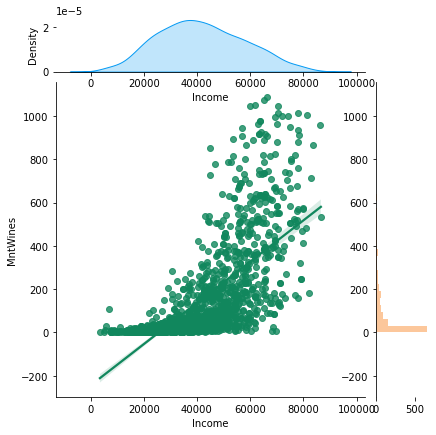

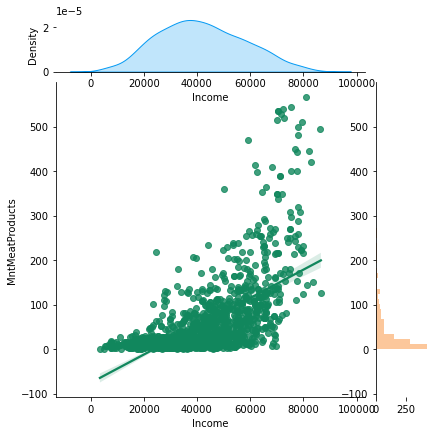

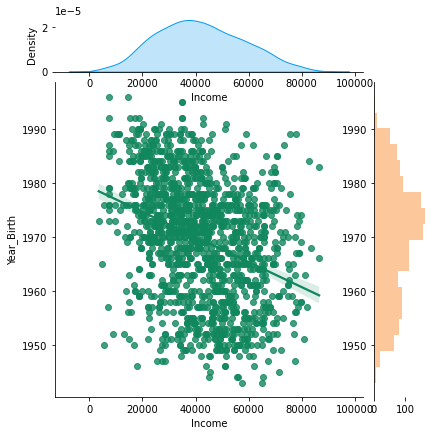

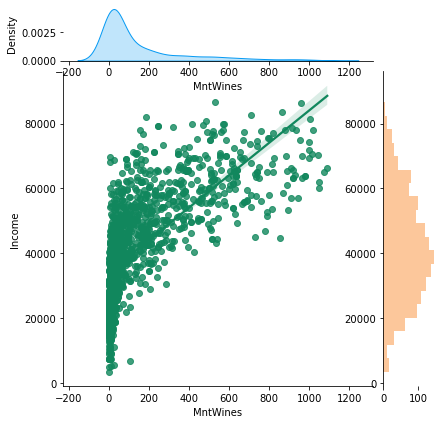

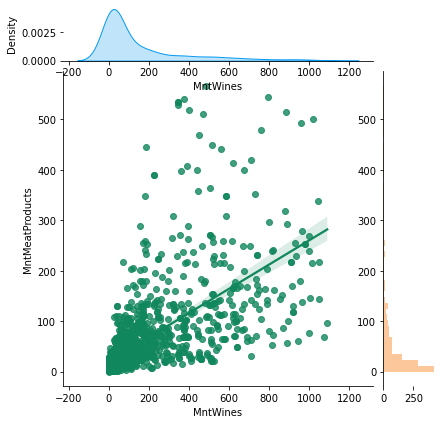

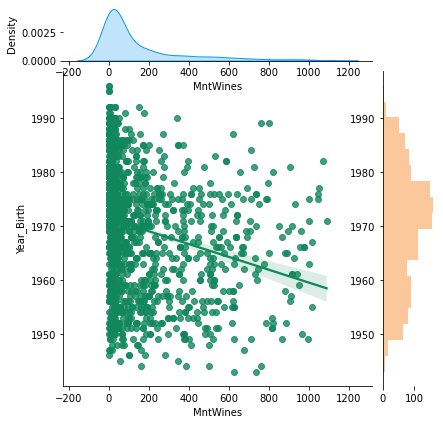

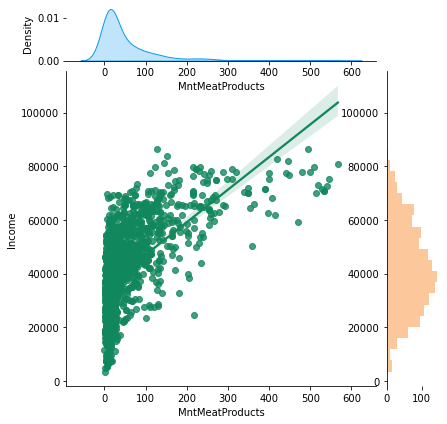

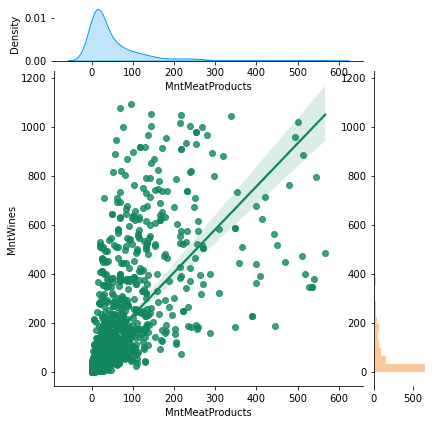

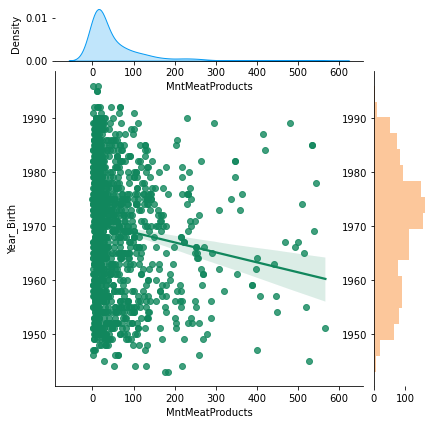

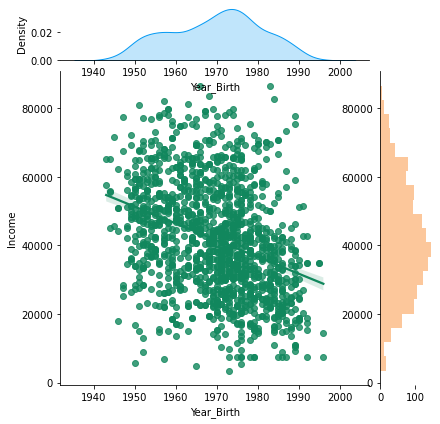

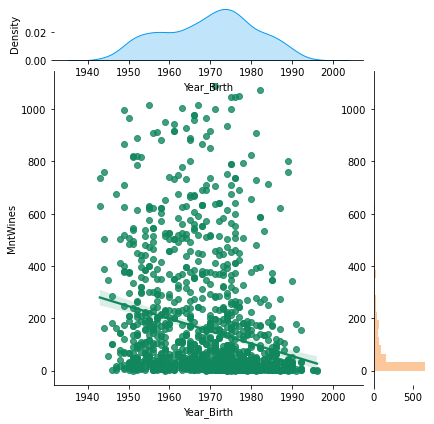

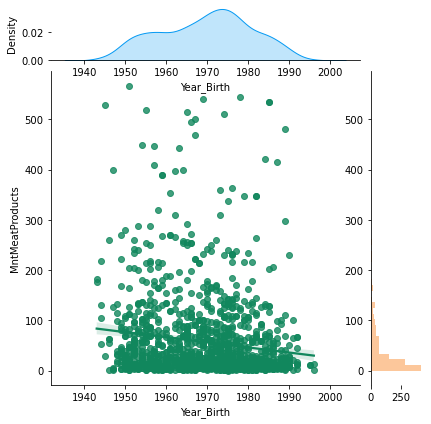

In [107]:
fig = plt.figure(figsize=(30,30))
quant = ["Income", "MntWines", "MntMeatProducts", "Year_Birth"]
for i in range(len(quant)):
    for j in range(len(quant)):
        sns.axes_style("darkgrid")
        if i == j:
            continue
        graph = sns.jointplot(data=df, x=df[quant[i]], y=df[quant[j]], 
                      kind="reg", color="xkcd:dark sea green")
        graph.ax_marg_x.clear()
        sns.kdeplot(df[quant[i]], shade=True, color="xkcd:azure", ax=graph.ax_marg_x)
        graph.ax_marg_y.clear()
        sns.distplot(df[quant[j]], vertical=True, kde=False, 
                 color="xkcd:orange", ax=graph.ax_marg_y);
plt.show()

Тут можно заметить интересные закономерности, например, с увеличением возраста увеличивается доход и траты на продукцию. Также если увеличиваются траты на какой-то один вид продукции, увеличиваются и остальные траты.

<Figure size 1728x2016 with 0 Axes>

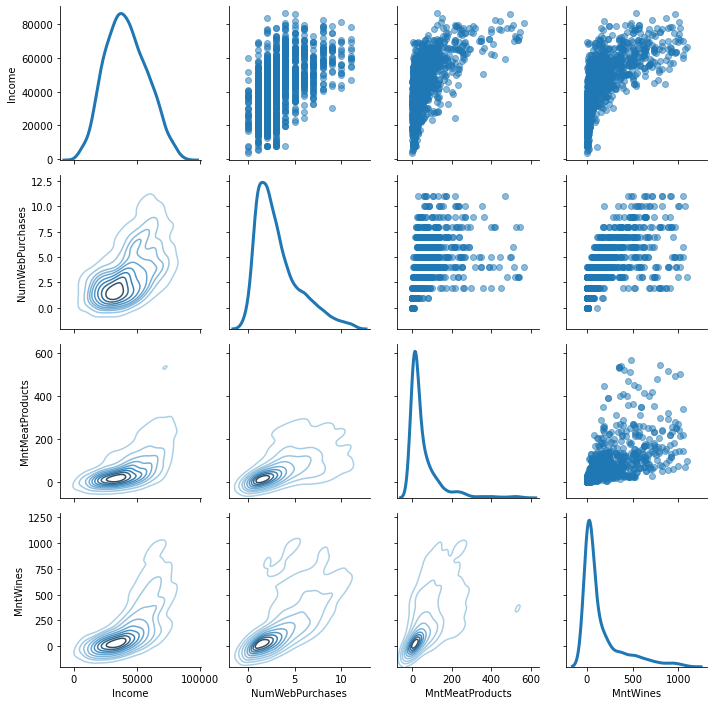

In [117]:
fig = plt.figure(figsize=(24,28))
graph = sns.PairGrid(df[["Income", "NumWebPurchases", "MntMeatProducts", "MntWines"]], diag_sharey=False)
graph.map_lower(sns.kdeplot, cmap='Blues_d')
graph.map_upper(plt.scatter, alpha=0.5)
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

Мы обратно подтверждаем наши догадки о том, что с повышением доходов повышаются и траты, но при этом, если мы посмотрим на распределение клиентов, то их становится меньше, что логично.
Покупки через интернет тоже положительно влияют на клиентов и его траты на продукцию.

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

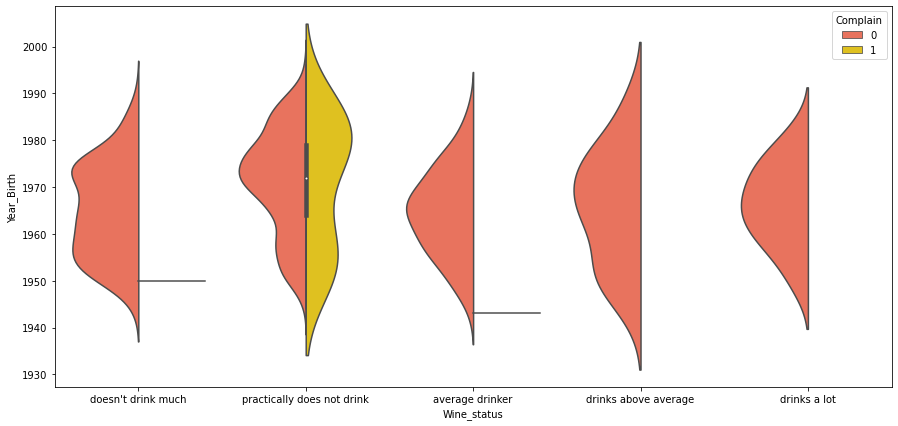

In [134]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Wine_status", y='Year_Birth', data=df, hue='Complain', palette=["tomato", "gold"], split=True)
plt.show()

На этом графике заметно, что люди, которые практически не выпивают(все возраста), чаще всего недовольны услугами, которые им предоставила компания.
Все остальные подгруппы вообще не жалуются.